<a href="https://colab.research.google.com/github/bsjin1122/deep-learning/blob/main/hongong/chapter03/03_kneighborsRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03-1 k최근접 이웃 회귀

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

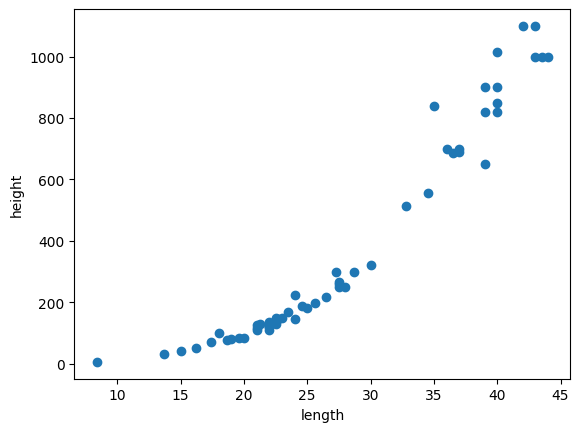

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('height')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [ ]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
print(knr.score(test_input, test_target))

0.992809406101064


In [ ]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [ ]:
#이웃의 개수를 3으로 설정합니다.
knr.n_neighbors = 3

#모델을 다시 훈련합니다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))

0.9746459963987609


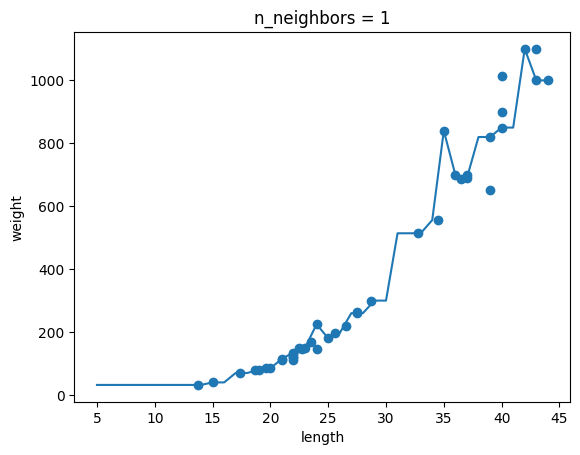

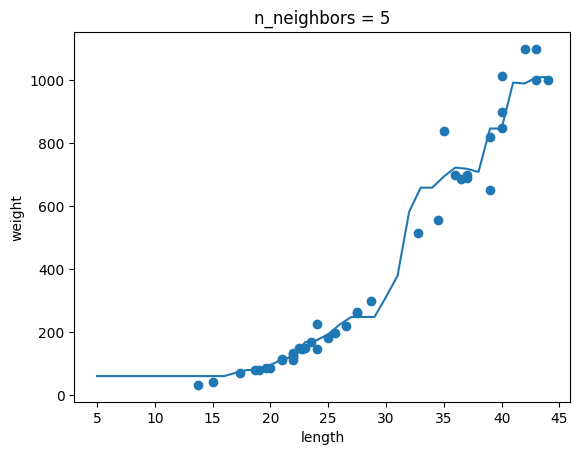

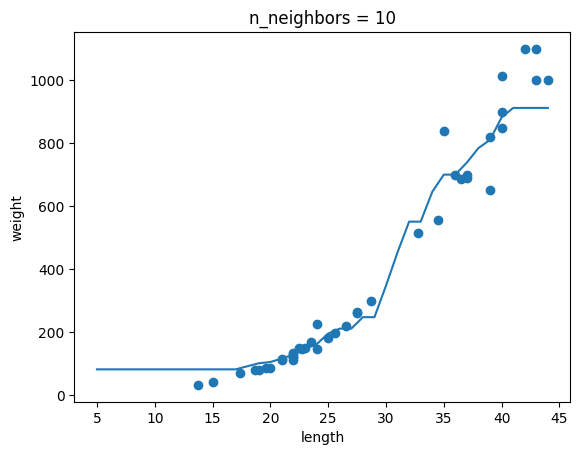

In [ ]:
# 128쪽 문제 2번
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()

# 5에서 45까지 x좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1,5, 10일때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델을 훈련합니다
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측을 구합니다.
    prediction = knr.predict(x)

    #훈련 세트와 예측 결과를 그래프로 나타냅니다.
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()



# 03-2 선형회귀

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
# 최근접 이웃 개수를 3으로 하는 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors =3)

# k-최근접 이웃 회귀 모델을 훈련 합니다.
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print(knr.predict([[50]]))

[1033.33333333]


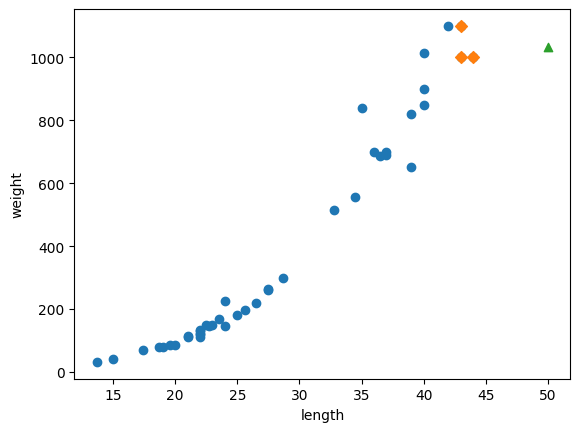

In [ ]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [ ]:
print(knr.predict([[100]]))

[1033.33333333]


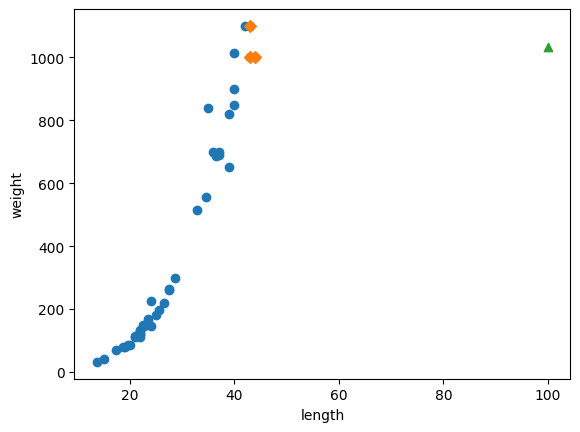

In [ ]:
# 100 cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 03-2 선형회귀

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1, 1)

In [4]:
# 최근접 이웃 개수를 3으로 하는 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [6]:
print(knr.predict([[50]]))
# 그런데 실제 농어의 무게는 훨씬 더 많이 나간다.

[1033.33333333]


In [ ]:
import matplotlib.pyplot as plt